In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
clean_male_df = pd.read_csv("male_complete.csv")
clean_female_df = pd.read_csv("female_complete.csv")

In [3]:
clean_male_df['Medal'].fillna('NA', inplace=True)
clean_female_df['Medal'].fillna('NA', inplace=True)

## Male Medal Tally

In [4]:
clean_male_df['Medal Count'] = np.where(clean_male_df.loc[:,'Medal'] == 'NA', 0, 1)

In [5]:
#Identifying team events 
event_medal_m = pd.pivot_table(clean_male_df, index = ['Team', 'Year', 'Event'], columns = 'Medal',
                              values = 'Medal Count', aggfunc = 'sum', fill_value = 0).\
                                drop('NA', axis = 1).reset_index()

event_medal_m = event_medal_m.loc[event_medal_m['Gold'] > 1, :]

team_sports_m = event_medal_m['Event'].unique()

In [6]:
team_sports_m

array(["Basketball Men's Basketball", "Football Men's Football",
       "Hockey Men's Hockey",
       "Swimming Men's 4 x 100 metres Freestyle Relay",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Athletics Men's 4 x 400 metres Relay", "Tennis Men's Doubles",
       "Badminton Men's Doubles", "Archery Men's Team",
       "Athletics Men's 4 x 100 metres Relay",
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Swimming Men's 50 metres Freestyle"], dtype=object)

### Remove Individual Sports with Multiple Winners

In [7]:
remove_sports_m = ["Swimming Men's 50 metres Freestyle"]
team_sports_m = list(set(team_sports_m) - set(remove_sports_m))

### Column to Identify Team/Individual Sport

In [8]:
team_event_m = clean_male_df['Event'].map(lambda x: x in team_sports_m)
single_event_m = [not i for i in team_event_m]

medal_m = clean_male_df['Medal Count'] == 1

# Put 1 under team event if medal is won and event in team event list
clean_male_df['Team Event'] = np.where(team_event_m & medal_m, 1, 0)

# Put 1 under single event if medal is won and event not in team event list
clean_male_df['Single Event'] = np.where(single_event_m & medal_m, 1, 0)

# Add new column event category
clean_male_df['Event Category'] = clean_male_df['Single Event'] + clean_male_df['Team Event']

# Group data together according to year, team, event and medal
# Sum Medal Count and Event Category
medal_tally_table_m = clean_male_df.groupby(['Year', 'Team', 'Event', 'Medal'])[['Medal Count', 'Event Category']].\
agg('sum').reset_index()

# Ensure that team event medals are only counted once instead of a sum of all members in the team
medal_tally_table_m['Medal Count Corrected'] = medal_tally_table_m['Medal Count']/medal_tally_table_m['Event Category']

# Group data according to year and team
# Sum corrected Medal Count
medal_tally_m = medal_tally_table_m.groupby(['Year','Team'])['Medal Count Corrected'].agg('sum').reset_index()

# Create pivot table to find total medal count of each Team by Year
# Include top 15 countries
medal_tally_pivot_m = pd.pivot_table(medal_tally_m, index = 'Team', columns = 'Year',
                                     values = 'Medal Count Corrected', aggfunc = 'sum',
                                     margins = True).sort_values('All', ascending = False)[1:15]

# print total medals won in the given period
medal_tally_pivot_m

Year,2000,2004,2008,2012,2016,All
Team,,,,,,
USA,31.0,39.0,33.0,34.0,39.0,176.0
China,6.0,6.0,11.0,17.0,14.0,54.0
Australia,16.0,10.0,12.0,6.0,8.0,52.0
Russia,10.0,9.0,13.0,8.0,2.0,42.0
Kenya,6.0,5.0,9.0,7.0,6.0,33.0
France,2.0,2.0,9.0,9.0,9.0,31.0
Japan,0.0,7.0,5.0,8.0,8.0,28.0
UK,4.0,4.0,4.0,7.0,8.0,27.0
Germany,7.0,3.0,3.0,6.0,5.0,24.0


<AxesSubplot:title={'center':'Olympic Performance Comparison (Male)'}, xlabel='Olympic Year', ylabel='Number of Medals'>

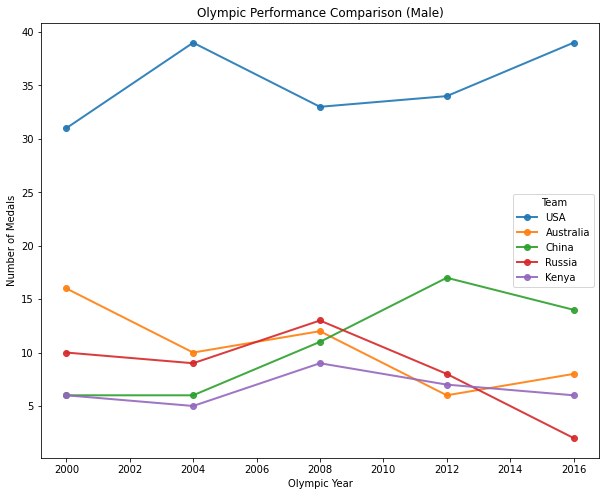

In [9]:
top_5_countries_m = ['USA', 'Australia', 'China', 'Russia', 'Kenya']

year_team_medals_m = pd.pivot_table(medal_tally_m, index = 'Year', columns = 'Team',
                                    values = 'Medal Count Corrected', aggfunc = 'sum')[top_5_countries_m]

year_team_medals_m.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2, 
                        xlabel='Olympic Year', ylabel='Number of Medals', title='Olympic Performance Comparison (Male)')



## Female Medal Tally

In [10]:
clean_female_df['Medal Count'] = np.where(clean_female_df.loc[:,'Medal'] == 'NA', 0, 1)

In [11]:
event_medal_f = pd.pivot_table(clean_female_df, index = ['Team', 'Year', 'Event'], columns = 'Medal',
                               values = 'Medal Count', aggfunc = 'sum',
                               fill_value = 0).drop('NA', axis = 1).reset_index()

event_medal_f = event_medal_f.loc[event_medal_f['Gold'] > 1, :]

team_sports_f = event_medal_f['Event'].unique()

In [12]:
team_event_f = clean_female_df['Event'].map(lambda x: x in team_sports_f)
single_event_f = [not i for i in team_event_f]

medal_f = clean_female_df['Medal Count'] == 1

clean_female_df['Team Event'] = np.where(team_event_f & medal_f, 1, 0)

clean_female_df['Single Event'] = np.where(single_event_f & medal_f, 1, 0)

clean_female_df['Event Category'] = clean_female_df['Single Event'] + \
clean_female_df['Team Event']

medal_tally_table_f = clean_female_df.\
groupby(['Year', 'Team', 'Event', 'Medal'])[['Medal Count', 'Event Category']].\
agg('sum').reset_index()

medal_tally_table_f['Medal Count Corrected'] = medal_tally_table_f['Medal Count']/medal_tally_table_f['Event Category']

medal_tally_f = medal_tally_table_f.groupby(['Year','Team'])['Medal Count Corrected'].agg('sum').reset_index()

medal_tally_pivot_f = pd.pivot_table(medal_tally_f, index = 'Team', columns = 'Year', 
                                     values = 'Medal Count Corrected', aggfunc = 'sum',
                                     margins = True).sort_values('All', ascending = False)[1:15]

# print total medals won in the given period
medal_tally_pivot_f

Year,2000,2004,2008,2012,2016,All
Team,,,,,,
USA,26.0,18.0,26.0,34.0,36.0,140.0
Russia,10.0,19.0,20.0,24.0,4.0,77.0
China,11.0,14.0,20.0,18.0,9.0,72.0
Australia,10.0,12.0,14.0,9.0,5.0,50.0
UK,4.0,5.0,7.0,6.0,8.0,30.0
Jamaica,7.0,4.0,7.0,5.0,6.0,29.0
Germany,6.0,8.0,4.0,4.0,4.0,26.0
Japan,5.0,4.0,1.0,9.0,5.0,24.0
South Korea,4.0,5.0,7.0,2.0,5.0,23.0


<AxesSubplot:title={'center':'Olympic Performance Comparison (Female)'}, xlabel='Olympic Year', ylabel='Number of Medals'>

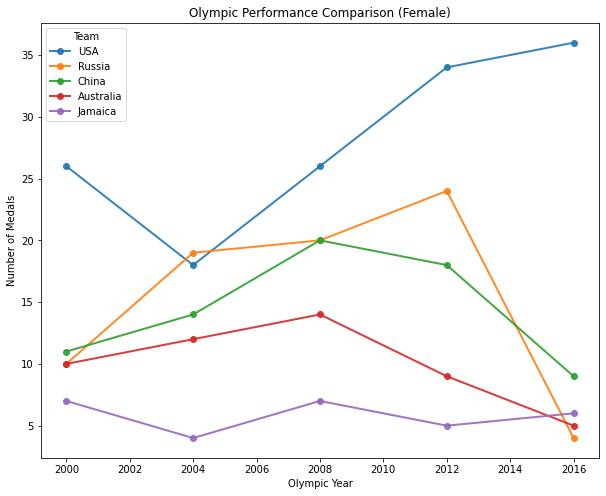

In [13]:
top_5_countries_f = ['USA', 'Russia', 'China', 'Australia', 'Jamaica']

year_team_medals_f = pd.pivot_table(medal_tally_f, index = 'Year', columns = 'Team',
                                    values = 'Medal Count Corrected', aggfunc = 'sum')[top_5_countries_f]

year_team_medals_f.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2, 
                        xlabel='Olympic Year', ylabel='Number of Medals', title='Olympic Performance Comparison (Female)')

## Medal Table for Male Athletes

In [14]:
m_medal_table = pd.pivot_table(medal_tally_table_m, index = 'Team', columns = 'Medal',
                               values = 'Medal Count Corrected', aggfunc = 'sum',
                               fill_value = 0, margins = True).drop('NA', axis = 1).sort_values('All', ascending = False)[1:15]

column_names = ['Gold', 'Silver', 'Bronze', 'All']
m_medal_table=m_medal_table.reindex(columns = column_names)
m_medal_table

Medal,Gold,Silver,Bronze,All
Team,,,,
USA,73,58,45,176.0
China,26,15,13,54.0
Australia,12,21,19,52.0
Russia,8,10,24,42.0
Kenya,12,10,11,33.0
France,5,13,13,31.0
Japan,6,9,13,28.0
UK,10,10,7,27.0
Germany,7,10,7,24.0


<AxesSubplot:title={'center':'Medal Count (Male)'}, xlabel='Team'>

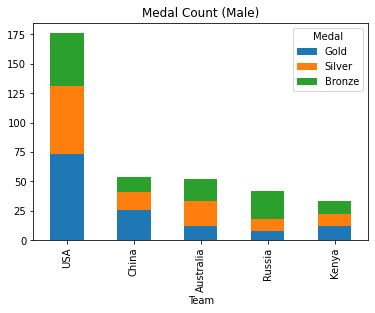

In [15]:
male_top_5 = pd.DataFrame(m_medal_table.head(5))
male_top_5.drop('All', axis=1, inplace=True)
male_top_5.plot(kind='bar', stacked=True, title = 'Medal Count (Male)')

## Medal Table for Female Athletes

In [16]:
f_medal_table = pd.pivot_table(medal_tally_table_f, index = 'Team', columns = 'Medal',
                               values = 'Medal Count Corrected', aggfunc = 'sum',
                               fill_value = 0, margins = True).drop('NA', axis = 1).sort_values('All', ascending = False)[1:15]

column_names = ['Gold', 'Silver', 'Bronze', 'All']
f_medal_table = f_medal_table.reindex(columns = column_names)
f_medal_table

Medal,Gold,Silver,Bronze,All
Team,,,,
USA,62,39,39,140.0
Russia,20,34,23,77.0
China,38,15,19,72.0
Australia,16,21,13,50.0
UK,8,8,14,30.0
Jamaica,8,11,10,29.0
Germany,5,6,15,26.0
Japan,5,6,13,24.0
South Korea,11,6,6,23.0


<AxesSubplot:title={'center':'Medal Count (Female)'}, xlabel='Team'>

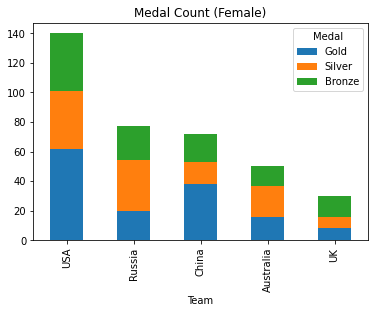

In [17]:
female_top_5 = pd.DataFrame(f_medal_table.head(5))
female_top_5.drop('All', axis=1, inplace=True)
female_top_5.plot(kind='bar', stacked=True, title = 'Medal Count (Female)')

## Country Performance by Year

In [18]:
#function to create new dataframe consisting of medal information according to year
def top_countries(data):
    sport_df = pd.DataFrame(columns=["Country", "Gold", "Silver", "Bronze", "Total", "GDP", "GDP Per Capita"])
    countries = list(data["Team"].unique())
    country_col = {"Country": countries}
    sport_df = sport_df.append(pd.DataFrame(country_col))
    sport_df["Gold"] = sport_df["Gold"].fillna(0)
    sport_df["Silver"] = sport_df["Silver"].fillna(0)
    sport_df["Bronze"] = sport_df["Bronze"].fillna(0)
    sport_df["Total"] = 0
    sport_df["GDP"] = 0 
    sport_df["GDP Per Capita"] = 0 
    for index, row in data.iterrows():
        country = row[16]
        gdp = row[19]
        gdppc = row[24]
        sport_df.loc[sport_df['Country']==country, 'GDP'] = gdp
        sport_df.loc[sport_df['Country']==country, 'GDP Per Capita'] = gdppc
        med = row[15]
        if med!="NA":
            sport_df.loc[sport_df["Country"]==row[16], med] += 1
    for index, row in sport_df.iterrows():
        total = row[1]+row[2]+row[3]
        sport_df.loc[index, "Total"] = total

    return sport_df

In [19]:
#function to plot linear regression line
from sklearn.linear_model import LinearRegression
def plot_medal_gdp(data):
    Y = pd.DataFrame(data['Total'])
    x = pd.DataFrame(data['GDP'])
    X = np.log(x)
    linreg = LinearRegression()
    linreg.fit(X, Y)
    Y_pred = linreg.predict(X)

    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()
    print('Correlation Coefficient = ', data.GDP.corr(data.Total))
    print('-'*50)
    
def plot_medal_gdppc(data):
    Y = pd.DataFrame(data['Total'])
    x = pd.DataFrame(data['GDP Per Capita'])
    X = np.log(x)
    linreg = LinearRegression()
    linreg.fit(X, Y)
    Y_pred = linreg.predict(X)

    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()
    print('Correlation Coefficient = ', data["GDP Per Capita"].corr(data.Total))
    print('-'*50)


In [20]:
male_data_2000 = clean_male_df[clean_male_df['Year']==2000]
medal_gdp_2000_m = top_countries(male_data_2000)
male_data_2004 = clean_male_df[clean_male_df['Year']==2004]
medal_gdp_2004_m = top_countries(male_data_2004)
male_data_2008 = clean_male_df[clean_male_df['Year']==2008]
medal_gdp_2008_m = top_countries(male_data_2008)
male_data_2012 = clean_male_df[clean_male_df['Year']==2012]
medal_gdp_2012_m = top_countries(male_data_2012)
male_data_2016 = clean_male_df[clean_male_df['Year']==2016]
medal_gdp_2016_m = top_countries(male_data_2016)

## Top Countries by Year (Male Athletes)

In [21]:
medal_gdp_list = [medal_gdp_2000_m, medal_gdp_2004_m, medal_gdp_2008_m, medal_gdp_2012_m, medal_gdp_2016_m]
i = 2000;
for item in medal_gdp_list:
    print("Year", i, "(Male)");
    display(item.sort_values(by = ['Total'], ascending=False).head(7))
    i+=4
    print("-"*100)

Year 2000 (Male)


,Country,Gold,Silver,Bronze,Total,GDP,GDP Per Capita
53,USA,35,21,10,66,10300000000000,36503.799230
54,Australia,15,15,19,49,415000000000,21667.623870
0,Netherlands,18,0,7,25,413000000000,25933.230530
85,South Korea,3,18,2,23,562000000000,11954.903210
32,Spain,0,17,2,19,595000000000,14666.781570
147,Cameroon,18,0,0,18,10083937740,660.192697
124,Chile,0,0,17,17,77860932152,5101.368479


----------------------------------------------------------------------------------------------------
Year 2004 (Male)


,Country,Gold,Silver,Bronze,Total,GDP,GDP Per Capita
58,USA,33,19,25,77,12300000000000,42007.436630
31,Italy,3,12,24,39,1800000000000,31203.775620
49,Australia,19,12,3,34,613000000000,30455.995310
109,Argentina,28,0,0,28,165000000000,4260.406805
91,Netherlands,1,22,0,23,651000000000,39983.345800
57,Germany,0,7,16,23,2820000000000,34175.082580
48,Paraguay,0,17,0,17,8033877360,1408.527976


----------------------------------------------------------------------------------------------------
Year 2008 (Male)


,Country,Gold,Silver,Bronze,Total,GDP,GDP Per Capita
5,USA,50,7,12,69,14700000000000,48340.321230
47,Australia,1,12,32,45,1060000000000,49884.230940
41,Argentina,18,0,12,30,362000000000,8964.303722
18,Spain,1,28,0,29,1640000000000,35687.779460
17,Brazil,1,0,22,23,1700000000000,8809.247351
39,Germany,18,0,1,19,3750000000000,45670.388140
71,Russia,2,8,7,17,1660000000000,11629.344760


----------------------------------------------------------------------------------------------------
Year 2012 (Male)


,Country,Gold,Silver,Bronze,Total,GDP,GDP Per Capita
1,USA,38,27,7,72,16200000000000,51592.623030
50,South Korea,1,2,23,26,1220000000000,24302.788840
16,Australia,0,4,22,26,1540000000000,67757.074520
14,Russia,2,3,19,24,2210000000000,15432.780270
48,China,9,4,10,23,8560000000000,6337.478113
4,France,9,8,6,23,2680000000000,40816.457070
34,Germany,17,3,1,21,3540000000000,44015.713710


----------------------------------------------------------------------------------------------------
Year 2016 (Male)


,Country,Gold,Silver,Bronze,Total,GDP,GDP Per Capita
5,USA,52,13,12,77,18600000000000,57562.415000
37,Germany,2,17,17,36,3480000000000,42096.255630
72,Argentina,18,1,0,19,545000000000,12429.462800
1,Australia,2,2,14,18,1200000000000,49736.481610
13,Brazil,18,0,0,18,1800000000000,8668.312860
124,Nigeria,0,0,18,18,405000000000,2177.540642
6,Belgium,0,17,0,17,468000000000,41240.169440


----------------------------------------------------------------------------------------------------


## Correlation Coefficient between GDP and Medal Count

In [22]:
print("Correlation Coefficients (Male Athletes):")
print("Year 2000:", medal_gdp_2000_m["GDP"].corr(medal_gdp_2000_m.Total))
print("Year 2004:", medal_gdp_2004_m["GDP"].corr(medal_gdp_2004_m.Total))
print("Year 2008:", medal_gdp_2008_m["GDP"].corr(medal_gdp_2008_m.Total))
print("Year 2012:", medal_gdp_2012_m["GDP"].corr(medal_gdp_2012_m.Total))
print("Year 2016:", medal_gdp_2016_m["GDP"].corr(medal_gdp_2016_m.Total))

Correlation Coefficients (Male Athletes):
Year 2000: 0.6606089952391634
Year 2004: 0.7899163439741623
Year 2008: 0.7745684014264502
Year 2012: 0.8565995893585798
Year 2016: 0.8239444483434065


### The Correlation Coefficients tell us that there is a moderately strong relation between GDP and the Total Medal Count. Therefore, we will proceed to plot the regression line for these 2 variables

## Plotting GDP against Medals (Male Athletes)

Year: 2000


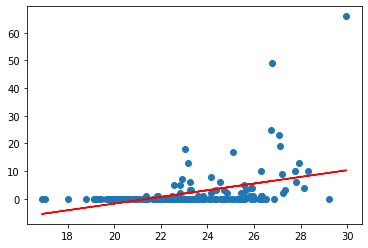

Correlation Coefficient =  0.6606089952391634
--------------------------------------------------
Year: 2004


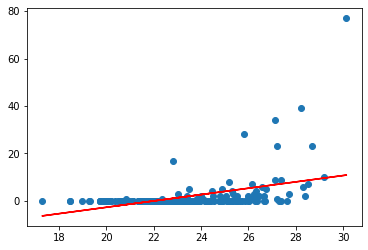

Correlation Coefficient =  0.7899163439741623
--------------------------------------------------
Year: 2008


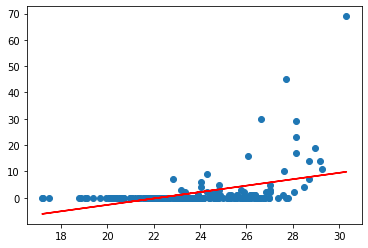

Correlation Coefficient =  0.7745684014264502
--------------------------------------------------
Year: 2012


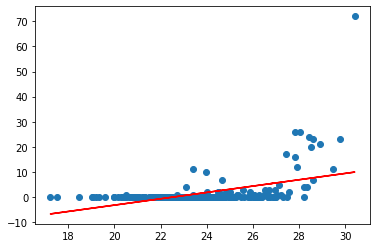

Correlation Coefficient =  0.8565995893585798
--------------------------------------------------
Year: 2016


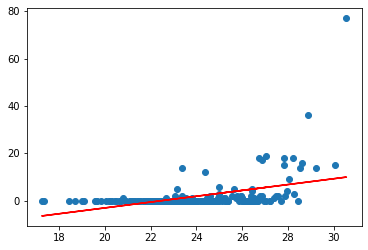

Correlation Coefficient =  0.8239444483434065
--------------------------------------------------


In [23]:
print("Year: 2000")
plot_medal_gdp(medal_gdp_2000_m)
print("Year: 2004")
plot_medal_gdp(medal_gdp_2004_m)
print("Year: 2008")
plot_medal_gdp(medal_gdp_2008_m)
print("Year: 2012")
plot_medal_gdp(medal_gdp_2012_m)
print("Year: 2016")
plot_medal_gdp(medal_gdp_2016_m)

## Plotting GDP Per Capita  against Medals (Male Athletes)

Year: 2000


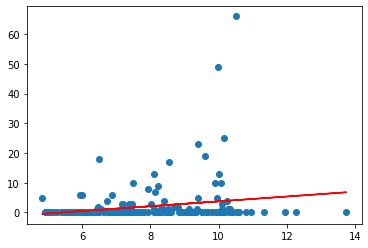

Correlation Coefficient =  0.009552765740473378
--------------------------------------------------
Year: 2004


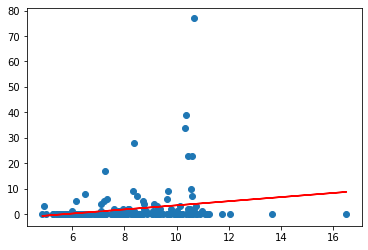

Correlation Coefficient =  -0.016330219994951777
--------------------------------------------------
Year: 2008


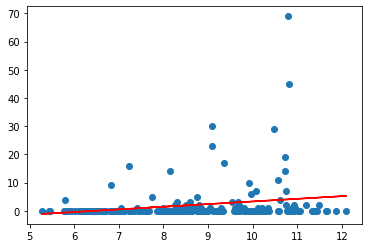

Correlation Coefficient =  0.13234030746123482
--------------------------------------------------
Year: 2012


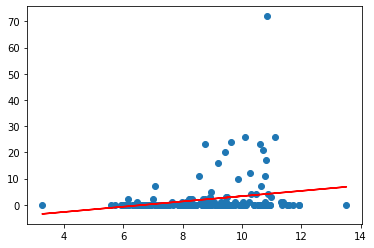

Correlation Coefficient =  0.058350955807495705
--------------------------------------------------
Year: 2016


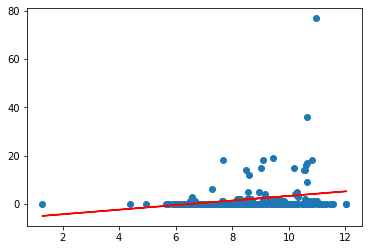

Correlation Coefficient =  0.16517892906175152
--------------------------------------------------


In [24]:
print("Year: 2000")
plot_medal_gdppc(medal_gdp_2000_m)
print("Year: 2004")
plot_medal_gdppc(medal_gdp_2004_m)
print("Year: 2008")
plot_medal_gdppc(medal_gdp_2008_m)
print("Year: 2012")
plot_medal_gdppc(medal_gdp_2012_m)
print("Year: 2016")
plot_medal_gdppc(medal_gdp_2016_m)

In [25]:
female_data_2000 = clean_female_df[clean_female_df['Year']==2000]
medal_gdp_2000_f = top_countries(female_data_2000)
female_data_2004 = clean_female_df[clean_female_df['Year']==2004]
medal_gdp_2004_f = top_countries(female_data_2004)
female_data_2008 = clean_female_df[clean_female_df['Year']==2008]
medal_gdp_2008_f = top_countries(female_data_2008)
female_data_2012 = clean_female_df[clean_female_df['Year']==2012]
medal_gdp_2012_f = top_countries(female_data_2012)
female_data_2016 = clean_female_df[clean_female_df['Year']==2016]
medal_gdp_2016_f = top_countries(female_data_2016)

## Top Countries by Year (Female Athletes)

In [26]:
medal_gdp_list_f = [medal_gdp_2000_f, medal_gdp_2004_f, medal_gdp_2008_f, medal_gdp_2012_f, medal_gdp_2016_f]
i = 2000;
for item in medal_gdp_list_f:
    print("Year", i, "(Female)");
    display(item.sort_values(by = ['Total'], ascending=False).head(7))
    i+=4
    print("-"*100)

Year 2000 (Female)


,Country,Gold,Silver,Bronze,Total,GDP,GDP Per Capita
2,USA,45,15,14,74,10300000000000,36503.799230
30,Australia,18,28,1,47,415000000000,21667.623870
32,Germany,1,0,28,29,1950000000000,23719.307030
10,Netherlands,3,7,16,26,413000000000,25933.230530
117,Norway,18,1,0,19,171000000000,38076.432090
4,Argentina,0,16,0,16,284000000000,7663.775696
8,Jamaica,0,14,2,16,8929375580,3360.870402


----------------------------------------------------------------------------------------------------
Year 2004 (Female)


,Country,Gold,Silver,Bronze,Total,GDP,GDP Per Capita
23,USA,44,19,5,68,12300000000000,42007.436630
25,Germany,16,2,29,47,2820000000000,34175.082580
28,Russia,5,16,17,38,591000000000,4102.256440
0,Australia,14,15,4,33,613000000000,30455.995310
15,Netherlands,1,18,6,25,651000000000,39983.345800
35,China,11,11,1,23,1960000000000,1512.258164
21,Argentina,0,0,19,19,165000000000,4260.406805


----------------------------------------------------------------------------------------------------
Year 2008 (Female)


,Country,Gold,Silver,Bronze,Total,GDP,GDP Per Capita
23,USA,40,24,12,76,14700000000000,48340.321230
12,China,9,26,13,48,4600000000000,3472.602300
17,Australia,19,15,8,42,1060000000000,49884.230940
3,Russia,9,12,18,39,1660000000000,11629.344760
42,Netherlands,22,0,0,22,936000000000,56914.943720
39,Brazil,1,18,0,19,1700000000000,8809.247351
32,Germany,2,0,17,19,3750000000000,45670.388140


----------------------------------------------------------------------------------------------------
Year 2012 (Female)


,Country,Gold,Silver,Bronze,Total,GDP,GDP Per Capita
1,USA,68,8,13,89,16200000000000,51592.623030
13,Australia,8,15,14,37,1540000000000,67757.074520
74,Japan,0,22,10,32,6200000000000,48578.301170
9,Russia,6,15,10,31,2210000000000,15432.780270
52,Netherlands,18,5,1,24,829000000000,49477.880050
16,China,10,6,5,21,8560000000000,6337.478113
2,UK,1,2,18,21,2660000000000,41758.045100


----------------------------------------------------------------------------------------------------
Year 2016 (Female)


,Country,Gold,Silver,Bronze,Total,GDP,GDP Per Capita
0,USA,49,16,10,75,18600000000000,57562.41500
28,Germany,18,2,17,37,3480000000000,42096.25563
35,Canada,1,1,32,34,1530000000000,42164.52847
42,UK,16,4,10,30,2650000000000,40373.42278
9,Sweden,1,19,1,21,514000000000,51902.82418
18,Australia,5,13,1,19,1200000000000,49736.48161
52,Netherlands,1,17,0,18,777000000000,45656.44448


----------------------------------------------------------------------------------------------------


In [27]:
print("Correlation Coefficients (Female Athletes):")
print("Year 2000:", medal_gdp_2000_f["GDP"].corr(medal_gdp_2000_f.Total))
print("Year 2004:", medal_gdp_2004_f["GDP"].corr(medal_gdp_2004_f.Total))
print("Year 2008:", medal_gdp_2008_f["GDP"].corr(medal_gdp_2008_f.Total))
print("Year 2012:", medal_gdp_2012_f["GDP"].corr(medal_gdp_2012_f.Total))
print("Year 2016:", medal_gdp_2016_f["GDP"].corr(medal_gdp_2016_f.Total))

Correlation Coefficients (Female Athletes):
Year 2000: 0.7336667238030744
Year 2004: 0.7290282641433455
Year 2008: 0.7831399603152136
Year 2012: 0.8583073366818714
Year 2016: 0.7440368557265699


## Plotting GDP against Medals (Female Athletes)

Year: 2000


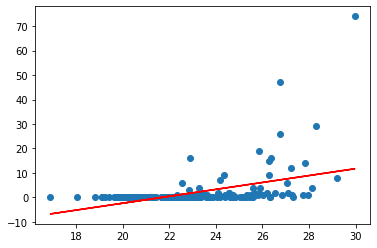

Correlation Coefficient =  0.7336667238030744
--------------------------------------------------
Year: 2004


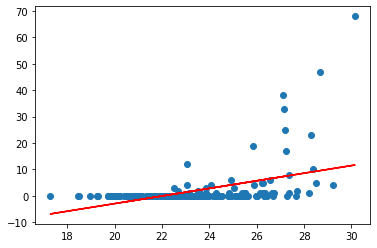

Correlation Coefficient =  0.7290282641433455
--------------------------------------------------
Year: 2008


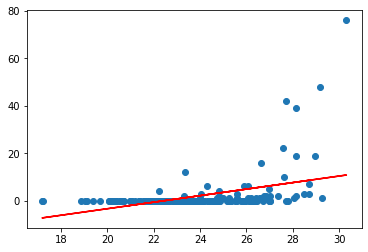

Correlation Coefficient =  0.7831399603152136
--------------------------------------------------
Year: 2012


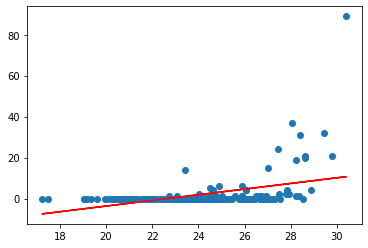

Correlation Coefficient =  0.8583073366818714
--------------------------------------------------
Year: 2016


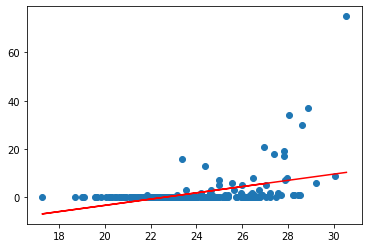

Correlation Coefficient =  0.7440368557265699
--------------------------------------------------


In [28]:
print("Year: 2000")
plot_medal_gdp(medal_gdp_2000_f)
print("Year: 2004")
plot_medal_gdp(medal_gdp_2004_f)
print("Year: 2008")
plot_medal_gdp(medal_gdp_2008_f)
print("Year: 2012")
plot_medal_gdp(medal_gdp_2012_f)
print("Year: 2016")
plot_medal_gdp(medal_gdp_2016_f)

## Plotting GDP Per Capita against Medals (Female Athletes)

Year: 2000


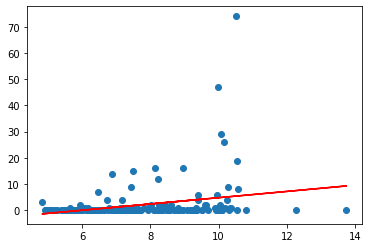

Correlation Coefficient =  0.02776213445742257
--------------------------------------------------
Year: 2004


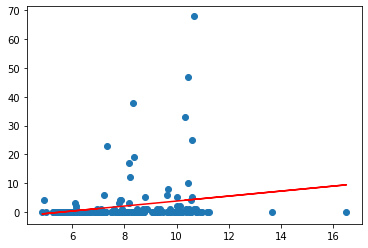

Correlation Coefficient =  -0.017269369434358004
--------------------------------------------------
Year: 2008


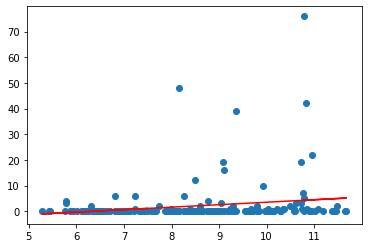

Correlation Coefficient =  0.15529319870226324
--------------------------------------------------
Year: 2012


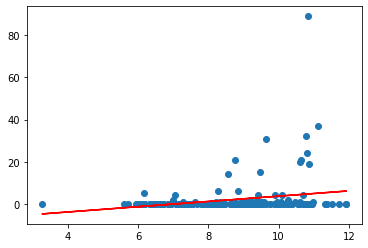

Correlation Coefficient =  0.20584000299854632
--------------------------------------------------
Year: 2016


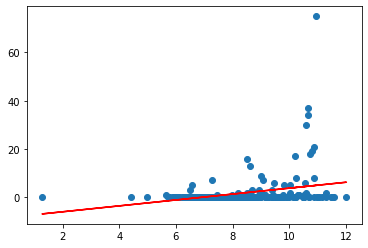

Correlation Coefficient =  0.25690842194987534
--------------------------------------------------


In [29]:
print("Year: 2000")
plot_medal_gdppc(medal_gdp_2000_f)
print("Year: 2004")
plot_medal_gdppc(medal_gdp_2004_f)
print("Year: 2008")
plot_medal_gdppc(medal_gdp_2008_f)
print("Year: 2012")
plot_medal_gdppc(medal_gdp_2012_f)
print("Year: 2016")
plot_medal_gdppc(medal_gdp_2016_f)

## Conclusions
- Based on the correlation coefficients, we can conclude that GDP and Medal Count are strongly related 
- However, there is a fall in the correlation coefficients between GDP Per Capita and Medal Count. This could be due to how population affects GDP Per Capita. For instance, Singapore has a high GDP Per Capita due to a low population, but it has a very low medal count. 